# Representational Similarity Analysis

# BLABLA

In [9]:

from mne.decoding import SlidingEstimator, cross_val_multiscore
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import make_pipeline

import seaborn as sns #a nice library for (“publication-ready“) visualization
import pandas as pd #a nice library for handling data frames
import numpy as np
import mne

from scipy.stats import spearmanr

import itertools
import matplotlib.pyplot as plt

In [4]:
info = mne.io.read_info("sample-info.fif", verbose = True)
info = mne.Info(info, sfreq=100)

datapath = "/Users/b1019548/Library/CloudStorage/OneDrive-UniversitätSalzburg/Teaching/Master_VO_MethodsCogNeuro/Lecture3_Decoding/data/dataset4nathan.mat"
epochs = mne.read_epochs_fieldtrip(datapath, info)

Adding metadata with 3 columns
2845 matching events found
No baseline correction applied


In [5]:
epochs.event_id = {
                    "200Hz": 16,
                    "431Hz": 32,
                    "928Hz": 64,
                    "2000Hz": 128
                }

In [6]:
# make empty rdm mat and prepare all combos of decoding

#empty mat
scoreMat = np.empty((4, 4))
scoreMat[:] = np.nan

# prepare 
vector = np.arange(0,4)
combinations = np.array(list(itertools.product([0, 1], repeat=len(vector))))

sums = np.sum(combinations, 1)
ind2 = np.where(sums == 2)[0]
combinations = combinations[ind2]

ones_indices = []
for row in combinations:
    ones_indices.append(np.where(row == 1)[0])

ones_indices = np.array(ones_indices)


In [7]:
clf = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis())
time_decod = SlidingEstimator(clf, n_jobs=None, scoring="balanced_accuracy", verbose=True)

for ii in range(len(ones_indices)):
    str0 = list(epochs.event_id)[ones_indices[ii,0]]
    str1 = list(epochs.event_id)[ones_indices[ii,1]]
    #print(str0, str1)
    alldata = epochs[str0].get_data()
    alldata = np.concatenate((alldata, epochs[str1].get_data()), axis=0)
    
    labelvec = np.append(np.zeros(epochs[str0].get_data().shape[0]),
                            np.ones(epochs[str1].get_data().shape[0]))
    
    alldata = alldata.reshape(alldata.shape[0], alldata.shape[1]*alldata.shape[2],1) #maintain 3D array to “trick“ SlidingEstimator
    
    scores = cross_val_multiscore(time_decod, alldata, labelvec, cv=4, n_jobs=None)
    
    scoreMat[ones_indices[ii,1], ones_indices[ii,0]] = np.mean(scores)
    

  0%|          | Fitting SlidingEstimator : 0/1 [00:00<?,       ?it/s]

0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.


  0%|          | Fitting SlidingEstimator : 0/1 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/1 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/1 [00:00<?,       ?it/s]

ERROR:tornado.general:SEND Error: Host unreachable


  0%|          | Fitting SlidingEstimator : 0/1 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/1 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/1 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/1 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/1 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/1 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/1 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/1 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/1 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/1 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/1 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/1 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/1 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/1 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/1 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/1 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/1 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/1 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/1 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/1 [00:00<?,       ?it/s]

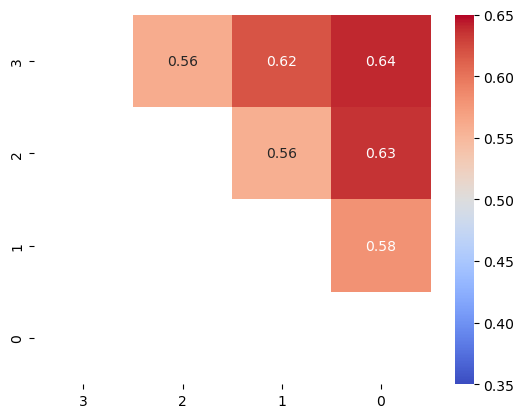

In [23]:
ax = sns.heatmap(scoreMat, cmap='coolwarm', annot=True, vmin = .35, vmax = .65)
ax.invert_yaxis()
ax.invert_xaxis()

plt.show()


Let's make 2 conceptual models:
- the first one assumes that only the highest and lowest tone are differentiate (mod0)
- the second model assumes sounds the differenation will be stronger the further the carrier frequencyies are apart (mod1)

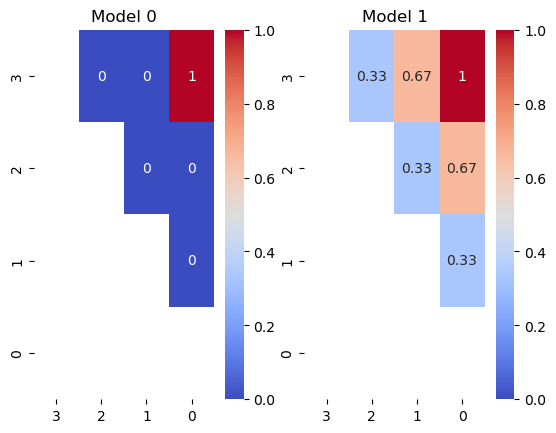

In [100]:
mod0 = np.tril(np.zeros((4,4)), -1)
mod0[np.triu_indices(4)] = np.nan
mod0[3,0] = 1 

cfvec = np.log10(np.array([200, 431, 928, 2000]))

mod1 = np.subtract.outer(cfvec, cfvec)
mod1 = np.abs(diffs)

mod1[np.triu_indices(4)] = np.nan


# Now plot

f, axes = plt.subplots(1, 2)
sns.heatmap(mod0, cmap='coolwarm', annot=True, vmin = 0, vmax = 1, ax = axes[0]).set(title = "Model 0")
axes[0].invert_yaxis()
axes[0].invert_xaxis()

sns.heatmap(mod1, cmap='coolwarm', annot=True, vmin = 0, vmax = 1, ax = axes[1]).set(title = "Model 1")
axes[1].invert_yaxis()
axes[1].invert_xaxis()
plt.show()



Let's perform a Spearman Rank Correlation to see which model describes the data better.

In [101]:
# get non-NaN values from mod0 and scoreMat
mod0_nonan = mod0[~np.isnan(scoreMat)]
mod1_nonan = mod1[~np.isnan(scoreMat)]

scoreMat_nonan = scoreMat[~np.isnan(scoreMat)] 

#we need to add a little variance to mod0 to make correlation calculation work
#mod0_nonan = mod0_nonan + np.random.uniform(low=-0.000000000000001, high=0.000000000000001, size=len(mod0_nonan)) 

# calculate spearman correlation
corr_mod0, pval = spearmanr(mod0_nonan, scoreMat_nonan)
corr_mod1, pval = spearmanr(mod1_nonan, scoreMat_nonan)


print("Spearman correlation between mod0 and scoreMat:", corr_mod0)
print("Spearman correlation between mod1 and scoreMat:", corr_mod1)


Spearman correlation between mod0 and scoreMat: 0.6546536707079772
Spearman correlation between mod1 and scoreMat: 0.8857142857142858


The similarity value above is static, but we have also got time information. So what we need is to have the neural RDM calculated per sampling point and then calcute the correlations fpr each time point.

In [109]:
#empty mat
scoreMat = np.empty((4, 4, epochs[str0].get_data().shape[2]))
scoreMat[:] = np.nan

clf = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis())
time_decod = SlidingEstimator(clf, n_jobs=None, scoring="balanced_accuracy", verbose=True)


for ii in range(len(ones_indices)):
    str0 = list(epochs.event_id)[ones_indices[ii,0]]
    str1 = list(epochs.event_id)[ones_indices[ii,1]]
    #print(str0, str1)
    alldata = epochs[str0].get_data()
    alldata = np.concatenate((alldata, epochs[str1].get_data()), axis=0)
        
    labelvec = np.append(np.zeros(epochs[str0].get_data().shape[0]),
                                np.ones(epochs[str1].get_data().shape[0]))
            
    scores = cross_val_multiscore(time_decod, alldata, labelvec, cv=4, n_jobs=None)
        
    scoreMat[ones_indices[ii,1], ones_indices[ii,0], ] = np.mean(scores, axis=0)

  0%|          | Fitting SlidingEstimator : 0/71 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/71 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/71 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/71 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/71 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/71 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/71 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/71 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/71 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/71 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/71 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/71 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/71 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/71 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/71 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/71 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/71 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/71 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/71 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/71 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/71 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/71 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/71 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/71 [00:00<?,       ?it/s]

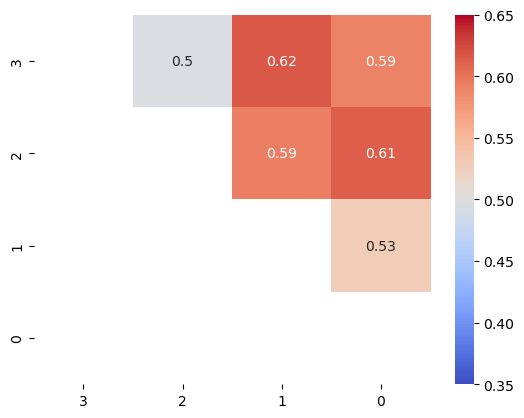

In [113]:
# some random RDM
ax = sns.heatmap(scoreMat[:,:,40], cmap='coolwarm', annot=True, vmin = .35, vmax = .65)
ax.invert_yaxis()
ax.invert_xaxis()

plt.show()

In [114]:
corrmod1_vec = []
corrmod0_vec = []
for i in range(scoreMat.shape[2]):
    scoreMat_nonan = scoreMat[:,:,i][~np.isnan(scoreMat[:,:,i])]
    mod1_nonan = mod1[~np.isnan(scoreMat[:,:,i])]
    corr, pval = spearmanr(mod1_nonan, scoreMat_nonan)
    corrmod1_vec.append(corr)
    
    mod0_nonan = mod0[~np.isnan(scoreMat[:,:,i])]
    corr, pval = spearmanr(mod0_nonan, scoreMat_nonan)
    corrmod0_vec.append(corr)
    
print(corrmod1_vec)


[-0.2, 0.7142857142857143, 0.08571428571428573, -0.2571428571428572, -0.08571428571428573, 0.6, 0.14285714285714288, 0.4285714285714286, 0.48571428571428577, -0.2, -0.14285714285714288, -0.2, -0.3714285714285715, -0.2571428571428572, 0.6571428571428573, 0.2, -0.5428571428571429, -0.2, -0.08571428571428573, 0.028571428571428574, -0.08571428571428573, -0.3142857142857143, -0.2, 0.7714285714285715, 0.8285714285714287, 0.5428571428571429, 0.5428571428571429, 0.7714285714285715, 0.6, 0.48571428571428577, 0.942857142857143, 0.7714285714285715, 0.3714285714285715, 0.3714285714285715, 0.48571428571428577, 0.7714285714285715, -0.08571428571428573, -0.2571428571428572, 0.08571428571428573, 0.5428571428571429, 0.3142857142857143, 0.08571428571428573, 0.2, 0.2571428571428572, 0.2571428571428572, -0.3142857142857143, 0.08571428571428573, 0.028571428571428574, 0.028571428571428574, 0.6, -0.028571428571428574, -0.14285714285714288, -0.5428571428571429, -0.3142857142857143, -0.3714285714285715, -0.2, 

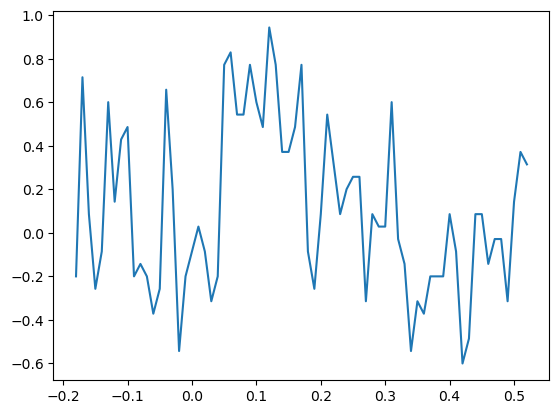

In [116]:
plt.plot(epochs.times, corrmod1_vec)